In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist #keras自帶的mnist資料集
import numpy as np

In [30]:
#建立模型
encoding_dim = 32  #輸入壓縮為32維

#輸入層跟輸出層的unit數目必須一致!!!!!!!!!!!!!!!

#輸入層
input_img = Input(shape=(784,))
#編碼層
encoded = Dense(encoding_dim, activation='relu')(input_img)
#解碼層
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [31]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [32]:
(x_train, _), (x_test, _) = mnist.load_data()

In [33]:
#資料標準化
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#更改資料維度，從N*28*28變為N*784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0691 - val_loss: 0.0400
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0346 - val_loss: 0.0293
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0263 - val_loss: 0.0231
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0214 - val_loss: 0.0193
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0182 - val_loss: 0.0166
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0160 - val_loss: 0.0147
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0143 - val_loss: 0.0134
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0131 - val_loss: 0.0123
Epoch 9/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0122 - val_loss: 0.0115
Epoch

In [35]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

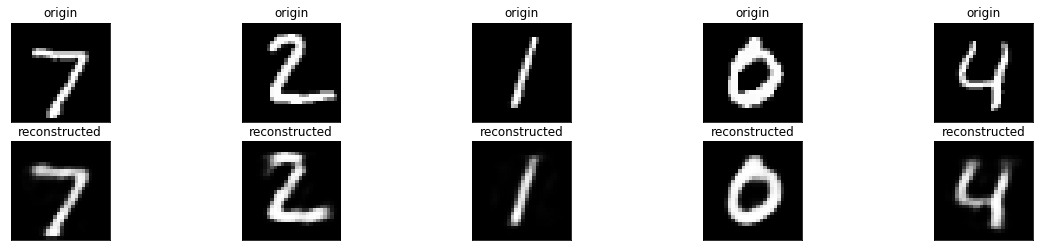

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 5  
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('origin')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)